* import necessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing

* read data

In [24]:
train=pd.read_csv('train.csv',sep=',',header=0,index_col=0)

* explore our data

In [ ]:
print(train.columns)
train.shape

In [ ]:
train.describe()

In [ ]:
train.head(2)

In [ ]:
train.dtypes

#### After several trials, I choose to do LabelEncoding to cat columns.

* LabelEncode cat1-cat116 columns

In [25]:
for n in range(116):
    x="cat" + str(n+1)
    enc = preprocessing.LabelEncoder()
    enc.fit(train[x])
    train[x]=enc.transform(train[x])

In [26]:
xfit=train[[x for x in range(130)]]
yfit=train["loss"]

#### plot correlation matrix

In [27]:
corrr=xfit.corr()

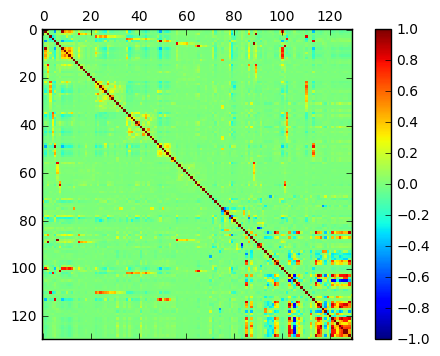

In [28]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

* Let's see some detailed parts.

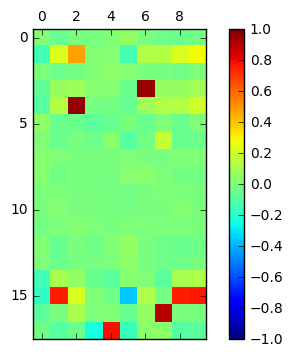

In [29]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrr.iloc[85:103,0:10], vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

Let's see the correlation between continuous variables

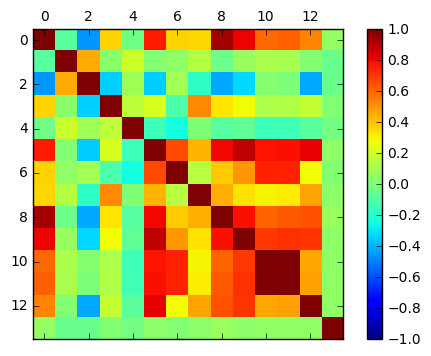

In [30]:
x2=train[[x for x in range(116,130)]]
corrr2=x2.corr()
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrr2, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

Some variables are strongly correlated.
We can find those correlation coefficients bigger than 0.95.

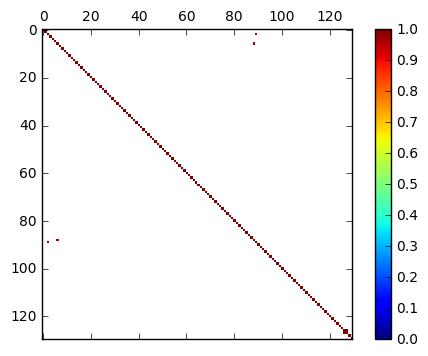

In [31]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrr[np.abs(corrr)>0.95], vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

In [32]:
print(corrr.iloc[2,89])
print(corrr.iloc[6,88])
print(corrr.iloc[126,127])

0.955737593978
0.955503792625
0.994384110022


```
We identified some Multicollinearity-Pair.
I will eliminate some columns for analysis.
```

In [33]:
train.drop(train[[88,89,127]],axis=1,inplace=True)

In [34]:
train.shape

(188318, 128)

#### Distribution
* We have too many variables. We will only check the distribution of dependent variable.

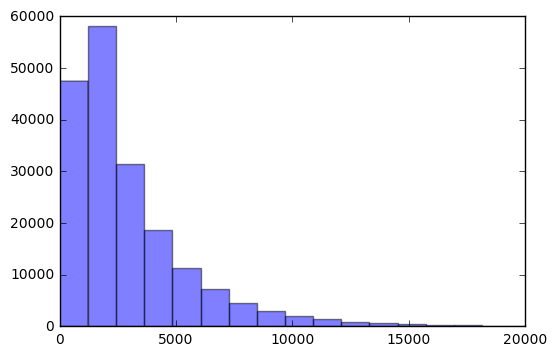

In [35]:
plt.hist(train["loss"],100, color="b",alpha=0.5)
plt.xlim(0,20000)
plt.show()

It's skewed. I will log-transform the variable.

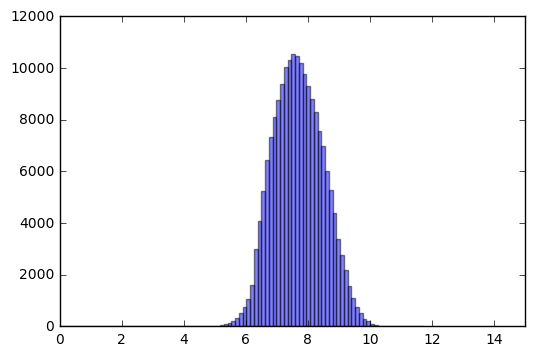

In [36]:
plt.hist(np.log(train["loss"]),100,color="b",alpha=0.5)
plt.xlim(0,15)
plt.show()

* That's much better!

In [37]:
train["logloss"]=np.log(train["loss"])

* re-assign input data

In [38]:
xfit=train[[x for x in range(127)]]
yfit=train["logloss"]

* fit our model

In [39]:
model = linear_model.LinearRegression(fit_intercept = True)

In [40]:
fit = model.fit(xfit, yfit)

* get model results

In [41]:
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % np.mean((model.predict(xfit) - yfit) ** 2))
print('Variance score: %.2f' % model.score(xfit, yfit))

Coefficients: 
 [ -1.72363210e-01   1.64827564e-01   1.37796164e-01  -3.06485038e-02
   4.93906181e-02  -1.86380685e-01   1.47933195e-01   5.75854883e-02
   3.97182626e-03   8.10431941e-02   4.31180591e-02   2.66651175e-01
   3.45900365e-02  -6.36637885e-02  -1.24642761e-01  -1.01789969e-01
  -8.89272761e-02  -9.48593244e-02   4.63653594e-02  -8.34013140e-02
  -1.99976083e-01  -3.79980315e-01   3.36256846e-03  -7.97429671e-02
   6.85001297e-02   1.62563173e-01   7.35891479e-02  -6.37190025e-02
   1.26554436e-02  -6.10495746e-02  -1.46563570e-01   1.00050247e-01
  -7.23390760e-02   3.69064054e-02   7.90242375e-02  -1.79403549e+00
  -1.72181058e+00  -1.66379716e+00  -1.91192082e+00  -1.84683103e+00
  -1.87078139e+00  -1.66893098e+00  -1.81650840e+00  -1.58155729e+00
  -1.81828857e+00  -1.79667920e+00  -1.76505919e+00  -1.69647878e+00
   1.67266926e-01   9.05404293e-02   1.84078905e-01   1.36582706e-01
   3.68982208e-01   3.89685478e-02   1.16541506e-01   2.05602583e-01
   4.01360539e-01 

* read test data

In [42]:
test=pd.read_csv('test.csv',sep=',',header=0,index_col=0)

* use the same encoding to test data 

In [43]:
for n in range(116):
    x="cat" + str(n+1)
    enc = preprocessing.LabelEncoder()
    enc.fit(test[x])
    test[x]=enc.transform(test[x])

In [44]:
test.drop(test[[88,89,127]],axis=1,inplace=True)

* use our model to do prediction to test data

In [57]:
result=model.predict(test)

In [58]:
pred=np.exp(result)

* output to csv for kaggle submission

In [59]:
testloss=pd.DataFrame({'loss':pred})

In [60]:
testid=pd.DataFrame(test.index)

In [61]:
submit=pd.concat([testid,testloss],axis=1)

In [62]:
submit.to_csv("submit.csv",index=False,sep=',')

### Final Kaggle Score: 1268(private score),1277(public score)
### Rank: 2470/3055